# Text Generation

In this example we will train a model using dataset designed for this lab

# Imports

In [6]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [7]:
tokenizer = Tokenizer()

data = open('lafontaine.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'de': 1, 'le': 2, 'et': 3, 'la': 4, 'les': 5, 'un': 6, 'il': 7, 'à': 8, 'que': 9, 'en': 10, 'je': 11, 'ne': 12, 'ce': 13, 'des': 14, 'vous': 15, 'son': 16, 'qui': 17, 'se': 18, 'du': 19, 'dit': 20, 'pour': 21, 'au': 22, 'plus': 23, 'tout': 24, 'sa': 25, 'pas': 26, 'on': 27, 'lui': 28, 'est': 29, 'par': 30, 'dans': 31, 'bien': 32, 'sur': 33, 'nous': 34, 'une': 35, 'si': 36, 'fait': 37, 'ces': 38, 'ses': 39, 'leur': 40, "qu'il": 41, 'mais': 42, 'sans': 43, 'a': 44, 'aux': 45, 'tous': 46, 'cette': 47, 'point': 48, "c'est": 49, "d'un": 50, 'elle': 51, 'moi': 52, 'ils': 53, 'comme': 54, 'me': 55, 'faire': 56, 'gens': 57, 'fut': 58, 'sont': 59, 'deux': 60, "l'autre": 61, 'mon': 62, 'quelque': 63, 'même': 64, 'peu': 65, "qu'on": 66, 'là': 67, 'tu': 68, 'rien': 69, 'notre': 70, 'quand': 71, 'avec': 72, 'y': 73, 'fit': 74, 'était': 75, 'maître': 76, 'ma': 77, 'tant': 78, 'faut': 79, "d'une": 80, 'peut': 81, 'temps': 82, 'cet': 83, 'fort': 84, 'votre': 85, 'bon': 86, 'car': 87, "s'en": 88, "n'e

# Create Training Data

This will split the input text into input sequences. It does it by breaking it into n-grams.


In [8]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

# created categorigal on-hot encoding labels
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [9]:
print(tokenizer.word_index)

{'de': 1, 'le': 2, 'et': 3, 'la': 4, 'les': 5, 'un': 6, 'il': 7, 'à': 8, 'que': 9, 'en': 10, 'je': 11, 'ne': 12, 'ce': 13, 'des': 14, 'vous': 15, 'son': 16, 'qui': 17, 'se': 18, 'du': 19, 'dit': 20, 'pour': 21, 'au': 22, 'plus': 23, 'tout': 24, 'sa': 25, 'pas': 26, 'on': 27, 'lui': 28, 'est': 29, 'par': 30, 'dans': 31, 'bien': 32, 'sur': 33, 'nous': 34, 'une': 35, 'si': 36, 'fait': 37, 'ces': 38, 'ses': 39, 'leur': 40, "qu'il": 41, 'mais': 42, 'sans': 43, 'a': 44, 'aux': 45, 'tous': 46, 'cette': 47, 'point': 48, "c'est": 49, "d'un": 50, 'elle': 51, 'moi': 52, 'ils': 53, 'comme': 54, 'me': 55, 'faire': 56, 'gens': 57, 'fut': 58, 'sont': 59, 'deux': 60, "l'autre": 61, 'mon': 62, 'quelque': 63, 'même': 64, 'peu': 65, "qu'on": 66, 'là': 67, 'tu': 68, 'rien': 69, 'notre': 70, 'quand': 71, 'avec': 72, 'y': 73, 'fit': 74, 'était': 75, 'maître': 76, 'ma': 77, 'tant': 78, 'faut': 79, "d'une": 80, 'peut': 81, 'temps': 82, 'cet': 83, 'fort': 84, 'votre': 85, 'bon': 86, 'car': 87, "s'en": 88, "n'e

# Training the Model

#Avoiding overfitting#


In [10]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss', min_delta=0.01, patience=3, verbose=0,
    mode='auto', baseline=None, restore_best_weights=False
)

In [11]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1, callbacks=[callback])
#print model.summary()
print(model)



/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1795/1795 [==============================] - 23s 9ms/step - loss: 7.0741 - accuracy: 0.0495
Epoch 2/100
1795/1795 [==============================] - 15s 8ms/step - loss: 6.0309 - accuracy: 0.0865
Epoch 3/100
1795/1795 [==============================] - 15s 9ms/step - loss: 5.0570 - accuracy: 0.1336
Epoch 4/100
1795/1795 [==============================] - 16s 9ms/step - loss: 4.3084 - accuracy: 0.1872
Epoch 5/100
1795/1795 [==============================] - 16s 9ms/step - loss: 3.7849 - accuracy: 0.2416
Epoch 6/100
1795/1795 [==============================] - 15s 8ms/step - loss: 3.4650 - accuracy: 0.2805
Epoch 7/100
1795/1795 [==============================] - 15s 9ms/step - loss: 3.2107 - accuracy: 0.3179
Epoch 8/100
1795/1795 [==============================] - 15s 9ms/step - loss: 3.0426 - accuracy: 0.3438
Epoch 9/100
1795/1795 [==============================] - 15s 9ms/step - loss: 2.9169 - accuracy: 0.3651
Epoch 10/100
1795/1795 [==============================] - 16s 9m

In [12]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

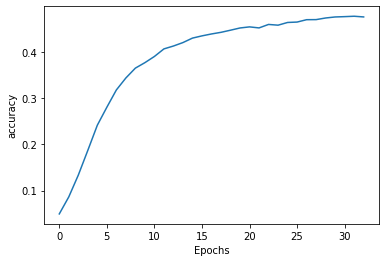

In [13]:
plot_graphs(history, 'accuracy')


# Predict next words

Now the following function uses the trained model to predict the following word taking as seed the previous ones.

In [47]:
seed_text = "Tant de preuves"
next_words = 9
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list, verbose=0), axis = -1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word 


seed_text = seed_text + "\n" + "Il fut"
next_words = 9
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list, verbose=0), axis = -1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word 


seed_text = seed_text+ "\n" + "Y aura t-il"
next_words = 9
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list, verbose=0), axis = -1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word

seed_text = seed_text + "\n"+ "Cependant, mordre"
next_words = 9
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list, verbose=0), axis = -1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word 


seed_text =  seed_text + "\n" + "Voila la morale de l'histoire, la cigale"
next_words = 9
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list, verbose=0), axis = -1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word

print(seed_text)


Tant de preuves abonde bière voulu l'être encore et d'allégresse s'assurer car
Il fut assez grande qui n'ai moqué la guide que je
Y aura t-il nous un père en croupe frivole part emportait village
Cependant, mordre jeune qu'il voit ces preuve trop qui de me
Voila la morale de l'histoire, la cigale tente à ceux grâce sur qu'à un point empire
